<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
# Initial check
print(df.head())
print(df.info())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

In [ ]:
# 2. Preprocessing
# Drop 'id' as it's not a useful feature
df.drop(['id'], axis=1, inplace=True)

In [ ]:
# Handle missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [ ]:
# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Define features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(y.value_counts())


stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)

#  Predict on original test data
y_pred = rf.predict(X_test)

In [ ]:
# 4. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9021526418786693
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.12      0.16      0.14        50

    accuracy                           0.90      1022
   macro avg       0.54      0.55      0.54      1022
weighted avg       0.92      0.90      0.91      1022

Confusion Matrix:
 [[914  58]
 [ 42   8]]


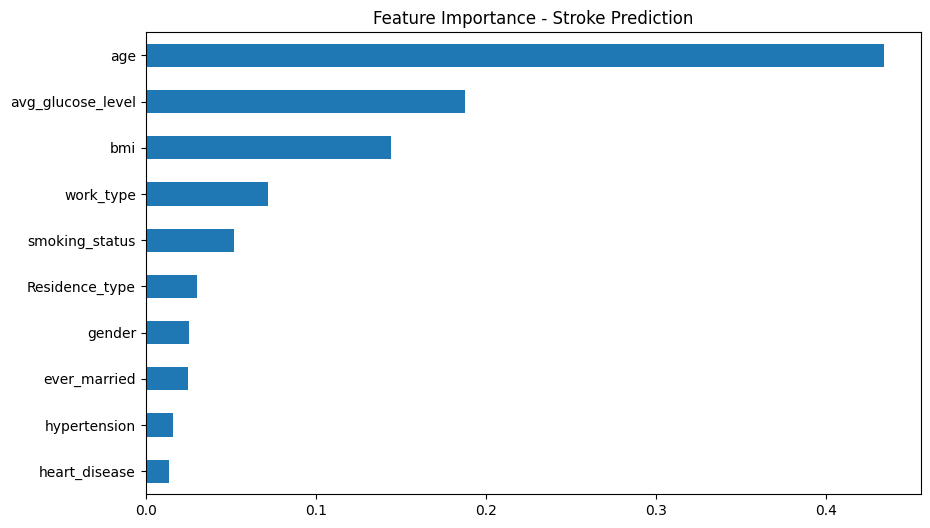

In [ ]:
# 5. Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance - Stroke Prediction")
plt.show()

In [ ]:
# 6. Hyperparameter Tuning (optional)
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 4, 8],
    'criterion': ['gini']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.9513211014116288
